In [1]:
import os
import pandas as pd
import yaml
import re
import matplotlib.pyplot as plt
import seaborn as sns
from utils import get_experiments_raw_stats, get_experiments_grouped_stats, plot_mean_dice_score

# Models trained on VessMap from Scratch vs Models pre-trained on Vess-Shape and then fine-tuned on VessMap

In [4]:
resnet50_finetuned_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet50_A'
resnet50_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_vessmap_resnet50'
resnet18_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_vessmap_resnet18'


resnet50_finetuned_results = get_experiments_raw_stats(resnet50_finetuned_path)
resnet50_scratch_results = get_experiments_raw_stats(resnet50_from_scratch_path)
resnet18_scratch_results = get_experiments_raw_stats(resnet18_from_scratch_path)

resnet50_scratch_grouped_run = get_experiments_grouped_stats(resnet50_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_run = get_experiments_grouped_stats(resnet18_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_run = get_experiments_grouped_stats(resnet50_finetuned_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples = get_experiments_grouped_stats(resnet50_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_samples = get_experiments_grouped_stats(resnet18_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_samples = get_experiments_grouped_stats(resnet50_finetuned_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples['model_type'] = resnet50_scratch_grouped_samples['model_class'] + '_scratch'
resnet18_scratch_grouped_samples['model_type'] = resnet18_scratch_grouped_samples['model_class'] + '_scratch'
resnet50_finetuned_grouped_samples['model_type'] = resnet50_finetuned_grouped_samples['model_class'] + '_finetuned'

all_stats_grouped_by_samples_vessmap = pd.concat([resnet50_scratch_grouped_samples, resnet18_scratch_grouped_samples, resnet50_finetuned_grouped_samples])


In [5]:
all_stats_grouped_by_samples_vessmap

,model_class,samples,wandb_group,mean_Dice,median_Dice,std_Dice,model_type
0,resnet50_unet,20,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.871863,0.871275,0.004024,resnet50_unet_scratch
1,resnet50_unet,18,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.853072,0.854691,0.020353,resnet50_unet_scratch
2,resnet50_unet,16,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.849404,0.849017,0.012170,resnet50_unet_scratch
3,resnet50_unet,14,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.846193,0.855451,0.017514,resnet50_unet_scratch
4,resnet50_unet,12,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.835322,0.834844,0.012630,resnet50_unet_scratch
5,resnet50_unet,10,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.830737,0.829197,0.012525,resnet50_unet_scratch
6,resnet50_unet,8,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.744821,0.749681,0.018131,resnet50_unet_scratch
7,resnet50_unet,6,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.718152,0.713293,0.056637,resnet50_unet_scratch
8,resnet50_unet,4,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.626603,0.602814,0.097633,resnet50_unet_scratch
9,resnet50_unet,2,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.670723,0.671522,0.036687,resnet50_unet_scratch


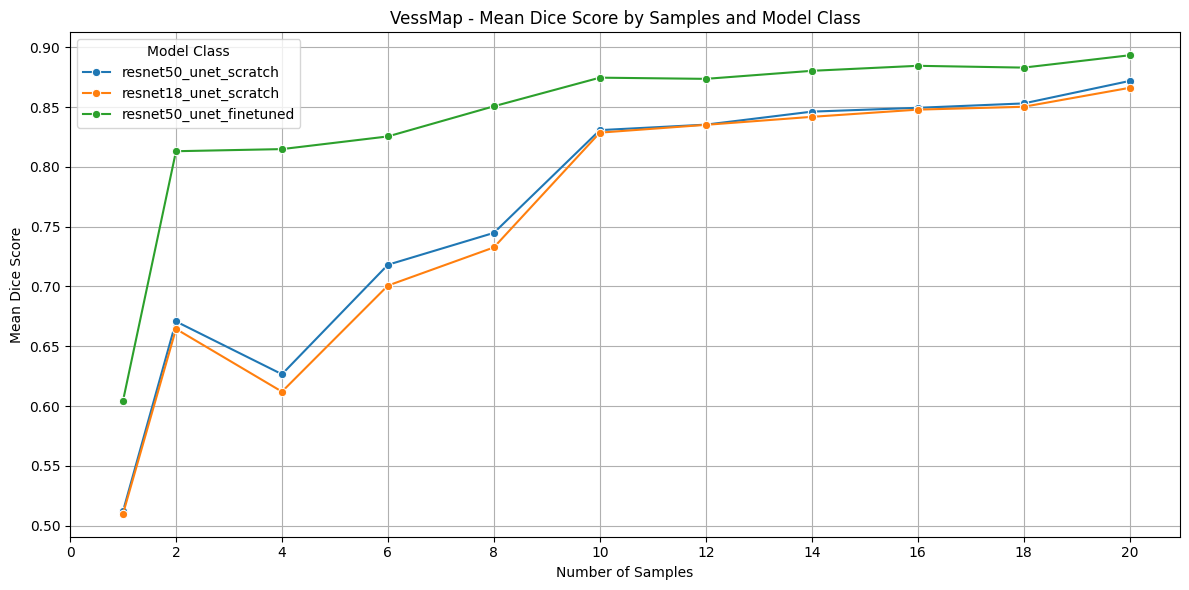

In [10]:
plot_mean_dice_score(all_stats_grouped_by_samples_vessmap, dataset_name='VessMap')

# Models trained on VessMap from Scratch vs Models pre-trained on Vess-Shape and then fine-tuned on DRIVE

In [7]:
resnet50_finetuned_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet50_A'
resnet18_finetuned_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet18_A'
resnet18_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet18_2'
resnet50_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet50_2'


resnet50_finetuned_results = get_experiments_raw_stats(resnet50_finetuned_path)
resnet18_finetuned_results = get_experiments_raw_stats(resnet18_finetuned_path)
resnet50_scratch_results = get_experiments_raw_stats(resnet50_from_scratch_path)
resnet18_scratch_results = get_experiments_raw_stats(resnet18_from_scratch_path)

resnet50_scratch_grouped_run = get_experiments_grouped_stats(resnet50_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_run = get_experiments_grouped_stats(resnet18_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_run = get_experiments_grouped_stats(resnet50_finetuned_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet18_finetuned_grouped_run = get_experiments_grouped_stats(resnet18_finetuned_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples = get_experiments_grouped_stats(resnet50_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_samples = get_experiments_grouped_stats(resnet18_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_samples = get_experiments_grouped_stats(resnet50_finetuned_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet18_finetuned_grouped_samples = get_experiments_grouped_stats(resnet18_finetuned_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples['model_type'] = resnet50_scratch_grouped_samples['model_class'] + '_scratch'
resnet18_scratch_grouped_samples['model_type'] = resnet18_scratch_grouped_samples['model_class'] + '_scratch'
resnet50_finetuned_grouped_samples['model_type'] = resnet50_finetuned_grouped_samples['model_class'] + '_finetuned'
resnet18_finetuned_grouped_samples['model_type'] = resnet18_finetuned_grouped_samples['model_class'] + '_finetuned'

all_stats_grouped_by_samples_drive = pd.concat([resnet50_scratch_grouped_samples, resnet18_scratch_grouped_samples, resnet50_finetuned_grouped_samples, resnet18_finetuned_grouped_samples])


In [8]:
all_stats_grouped_by_samples_drive

,model_class,samples,wandb_group,mean_Dice,median_Dice,std_Dice,model_type
0,resnet50_unet,16,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.736461,0.736214,0.003491,resnet50_unet_scratch
1,resnet50_unet,14,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.716017,0.710853,0.010875,resnet50_unet_scratch
2,resnet50_unet,12,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.719943,0.718984,0.009442,resnet50_unet_scratch
3,resnet50_unet,10,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.701643,0.696320,0.013735,resnet50_unet_scratch
4,resnet50_unet,8,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.679138,0.679198,0.009406,resnet50_unet_scratch
5,resnet50_unet,6,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.668975,0.670203,0.015079,resnet50_unet_scratch
6,resnet50_unet,4,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.657865,0.656679,0.016773,resnet50_unet_scratch
7,resnet50_unet,2,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.622621,0.640609,0.035106,resnet50_unet_scratch
8,resnet50_unet,1,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.585349,0.574332,0.037306,resnet50_unet_scratch
0,resnet18_unet,16,resnet18_unet | lr:0.01 | weights_id:FromScrat...,0.738824,0.739249,0.002224,resnet18_unet_scratch


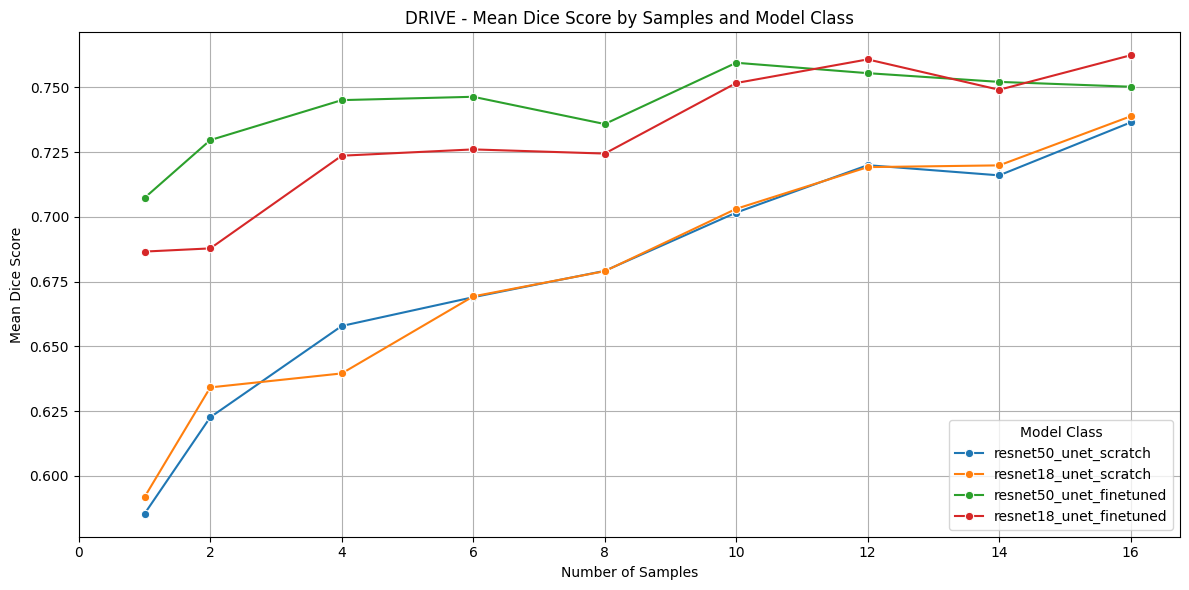

In [9]:
plot_mean_dice_score(all_stats_grouped_by_samples_drive, dataset_name='DRIVE')